In [35]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ejercicios

1. Cargad el csv que obtuvimos en los ejercicios de la clase invertida de ayer. 

2. ¿Qué columnas tienen nulos? 

3. Explorad los nulos que hay en el DataFrame. 

4. Con lo aprendido en la lección de hoy gestiona los nulos de la forma que consideres más correcta. Mañana en clase discutiremos sobre los métodos elegidos. 

5. Guardad el csv para los ejercicios de la clase invertida de mañana con las columnas sin nulos.

In [36]:
df = pd.read_csv("merchant_ejercicios_apply.csv", index_col = 0)
df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,NaN,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular
2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,43.0,18.0,23.0,8.0,7.0,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular
3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,22.0,7.0,8.0,5.0,5.0,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular
4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,1.0,1.0,2.0,2.0,1.0,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular


In [37]:
df.isnull().sum()[df.isnull().sum() > 0]

rating_five_count             45
rating_four_count             45
rating_three_count            45
rating_two_count              45
rating_one_count              45
product_color                 41
product_variation_size_id     14
origin_country                17
merchant_name                  4
merchant_info_subtitle       294
dtype: int64

In [38]:
# seleccionamos las variables categóricas
df_cat = df.select_dtypes(include = "O")
df_cat.head()

,title,uses_ad_boosts,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_is_express,origin_country,merchant_name,merchant_info_subtitle,merchant_id,product_url,product_id,seller_reputation
0,2020 Summer Vintage Flamingo Print Pajamas Se...,No,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,No,CN,zgrdejia,NaN,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,Buena
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Si,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,No,CN,sarahouse,83 % avis positifs,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,Regular
2,Nouvelle mode d'été femmes robe décontractée c...,Si,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,No,CN,sarahouse,83 % avis positifs,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,Regular
3,Summer Women s Fashion Lace Up Tie Pants Plus...,No,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,No,CN,sarahouse,83% Positive Feedback,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,Regular
4,Nouvelle mode d'été femmes robe décontractée c...,Si,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,No,CN,sarahouse,83 % avis positifs,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,Regular


In [39]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['product_color', 'product_variation_size_id', 'origin_country',
       'merchant_name', 'merchant_info_subtitle'],
      dtype='object')


In [40]:
# sacamos el 'value_counts()'  de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])
    print("........................")

La distribución de las categorías para la columna PRODUCT_COLOR


product_color
black               0.191990
white               0.161475
yellow              0.066751
pink                0.062937
blue                0.062937
                      ...   
red & blue          0.000636
winered & yellow    0.000636
claret              0.000636
lightpurple         0.000636
gold                0.000636
Name: count, Length: 101, dtype: float64

........................
La distribución de las categorías para la columna PRODUCT_VARIATION_SIZE_ID


product_variation_size_id
S            0.407502
XS           0.226319
M            0.127146
XXS          0.063573
L            0.031151
               ...   
White        0.000636
32/L         0.000636
Size XXS     0.000636
Pack of 1    0.000636
SIZE S       0.000636
Name: count, Length: 106, dtype: float64

........................
La distribución de las categorías para la columna ORIGIN_COUNTRY


origin_country
CN    0.963764
US    0.019708
VE    0.003179
SG    0.001271
AT    0.000636
GB    0.000636
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MERCHANT_NAME


merchant_name
广州唯适唯服饰有限公司                              0.009536
greatexpectationstechnology              0.007629
sjhdstoer                                0.005722
shuilingjiaointernationaltradecompany    0.005086
sangboostore                             0.005086
                                           ...   
asmalltwistofsweetfruit                  0.000636
supumawallsticker                        0.000636
haoyouduooo                              0.000636
successed                                0.000636
aishoppingmall                           0.000636
Name: count, Length: 957, dtype: float64

........................
La distribución de las categorías para la columna MERCHANT_INFO_SUBTITLE


merchant_info_subtitle
86 % avis positifs         0.085823
85 % avis positifs         0.082645
87 % avis positifs         0.068023
88 % avis positifs         0.066116
84 % avis positifs         0.064844
                             ...   
83% Positives Feedback     0.000636
61 % avis positifs         0.000636
84% ردود فعل إيجابية       0.000636
56 % avis positifs         0.000636
84% Positive Feedback      0.000636
Name: count, Length: 73, dtype: float64

........................


- Reemplazos por una categoría nueva: "product_color, "merchant_name", "merchant_info_subtitle"

- Reemplazos por la moda: "product_variation_size_id", "origin_country"

In [41]:
columnas_desconocido = ["product_color", "merchant_name", "merchant_info_subtitle"]
columnas_moda = [ "product_variation_size_id", "origin_country"]

In [42]:
for col in columnas_desconocido:
    df[col] = df[col].fillna("Unknown")
    
for col in columnas_moda:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)

In [43]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count'],
      dtype='object')


In [44]:
df[['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']].isnull().sum() / df.shape[0]

rating_five_count     0.028608
rating_four_count     0.028608
rating_three_count    0.028608
rating_two_count      0.028608
rating_one_count      0.028608
dtype: float64

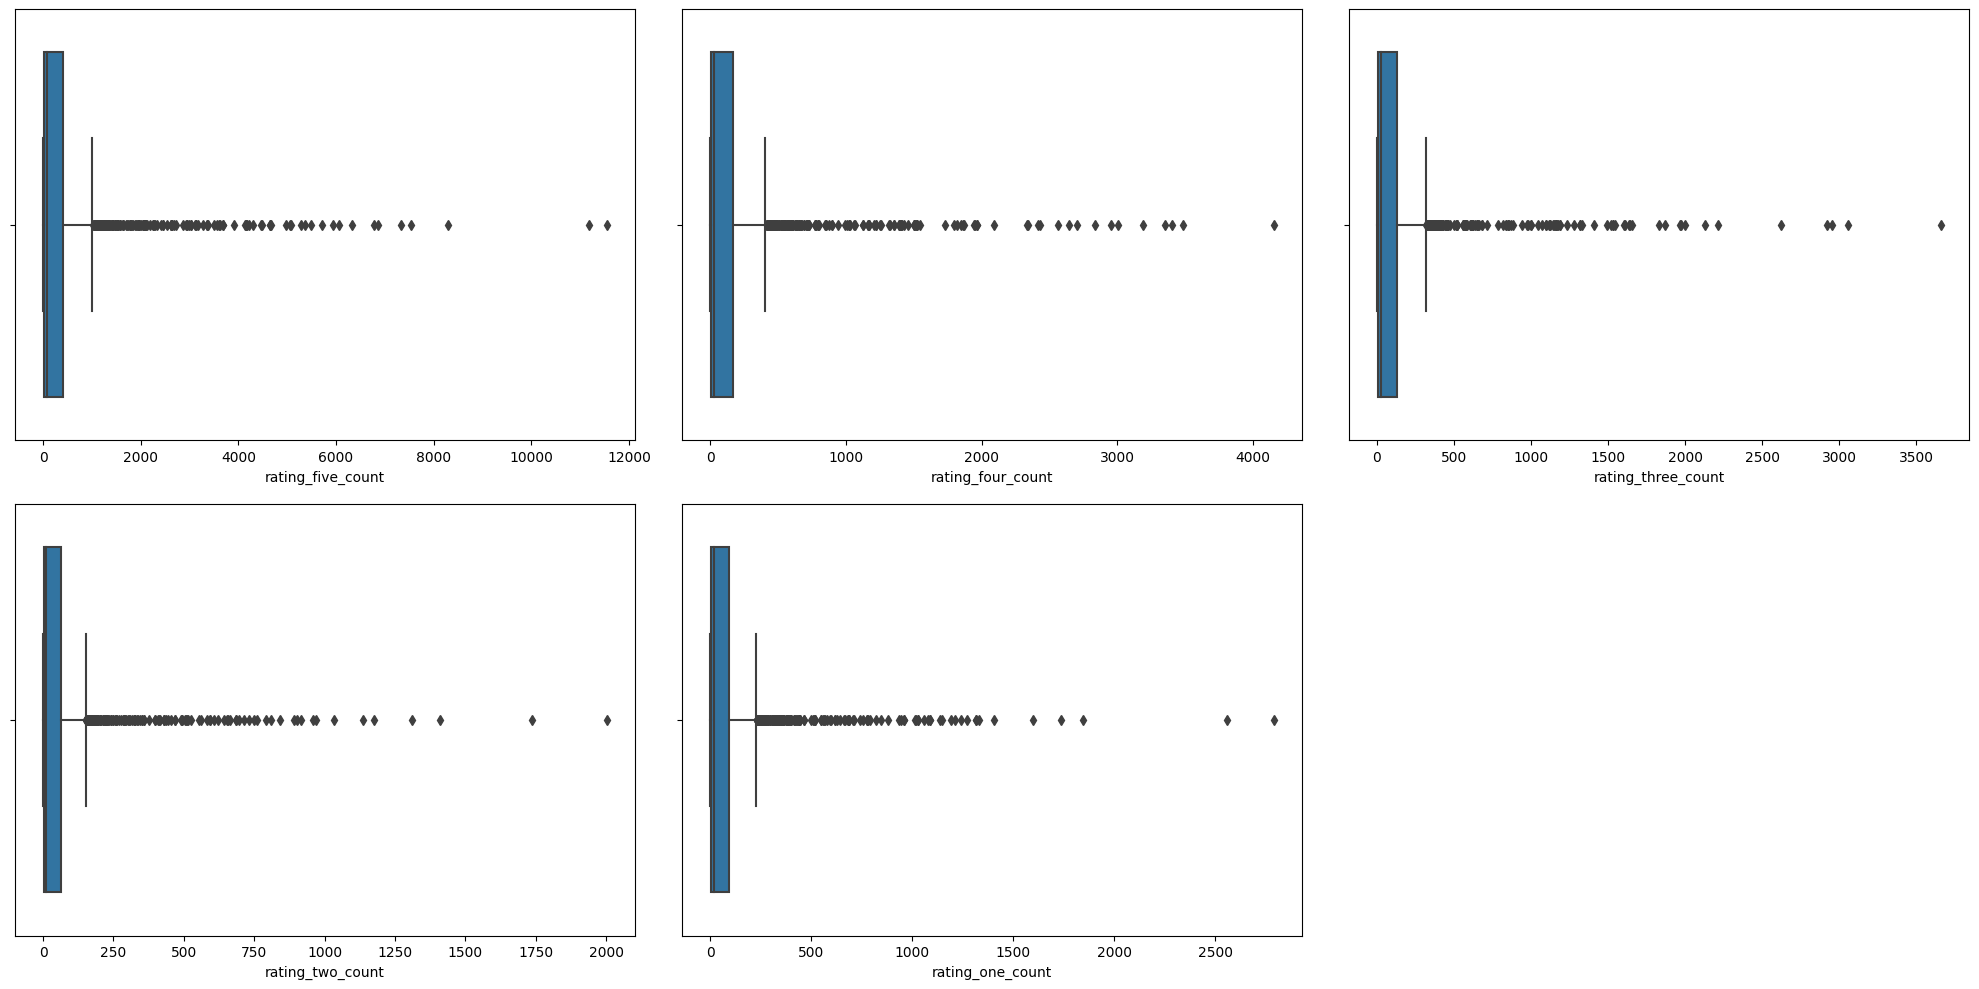

In [45]:
# lo siguiente que tendríamos que hacer es ver si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 
# Para hacer esto lo mejor es usar visualización, sin embargo, todavía no hemos aprendido (lo haremos mañana). Por lo tanto, el código que tenéis a continuación no es necesario que lo entendais. 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1])

In [46]:
# hemos dicho que para las tres columnas restantes aplicaremos los dos métodos para luego compararlos, empezaremos por el IterativeImputer
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[2.600e+01, 8.000e+00, 1.000e+01, 1.000e+00, 9.000e+00],
       [2.269e+03, 1.027e+03, 1.118e+03, 6.440e+02, 1.077e+03],
       [4.300e+01, 1.800e+01, 2.300e+01, 8.000e+00, 7.000e+00],
       ...,
       [2.800e+01, 1.100e+01, 7.000e+00, 7.000e+00, 9.000e+00],
       [2.400e+01, 1.500e+01, 8.000e+00, 3.000e+00, 9.000e+00],
       [8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]])

In [47]:
df[['rating_five_count_iter', 'rating_four_count_iter', 'rating_three_count_iter', 'rating_two_count_iter', 'rating_one_count_iter']] = imputer_iterative_imputado

In [48]:
# hagamos ahora lo mismo con el KNNImputer

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[2.600e+01, 8.000e+00, 1.000e+01, 1.000e+00, 9.000e+00],
       [2.269e+03, 1.027e+03, 1.118e+03, 6.440e+02, 1.077e+03],
       [4.300e+01, 1.800e+01, 2.300e+01, 8.000e+00, 7.000e+00],
       ...,
       [2.800e+01, 1.100e+01, 7.000e+00, 7.000e+00, 9.000e+00],
       [2.400e+01, 1.500e+01, 8.000e+00, 3.000e+00, 9.000e+00],
       [8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]])

In [49]:
df[['rating_five_count_knn', 'rating_four_count_knn', 'rating_three_count_knn', 'rating_two_count_knn', 'rating_one_count_knn']] = imputer_knn_imputado

In [50]:
df[['rating_five_count', 'rating_five_count_knn', 'rating_five_count_iter' ]].describe()
#nos podemos quedar con el iterative o con el knn

,rating_five_count,rating_five_count_knn,rating_five_count_iter
count,1528.000000,1573.000000,1573.000000
mean,442.263743,442.263743,442.263743
std,980.203270,966.071776,966.071776
min,0.000000,0.000000,0.000000
25%,12.000000,13.000000,13.000000
50%,79.000000,86.000000,86.000000
75%,413.500000,442.263743,442.263743
max,11548.000000,11548.000000,11548.000000


In [51]:
df[['rating_four_count', 'rating_four_count_knn', 'rating_four_count_iter' ]].describe()
# nos podemos quedar con el iterative o con el knn

,rating_four_count,rating_four_count_knn,rating_four_count_iter
count,1528.000000,1573.000000,1573.000000
mean,179.599476,179.599476,179.599476
std,400.516231,394.742028,394.742028
min,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000
50%,31.500000,35.000000,35.000000
75%,168.250000,179.599476,179.599476
max,4152.000000,4152.000000,4152.000000


In [52]:
df[['rating_three_count', 'rating_three_count_knn', 'rating_three_count_iter' ]].describe()
# nos podemos quedar con el iterative o con el knn

,rating_three_count,rating_three_count_knn,rating_three_count_iter
count,1528.000000,1573.000000,1573.000000
mean,134.549738,134.549738,134.549738
std,311.690656,307.197043,307.197043
min,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000
50%,24.000000,26.000000,26.000000
75%,129.250000,134.549738,134.549738
max,3658.000000,3658.000000,3658.000000


In [53]:
df[['rating_two_count', 'rating_two_count_knn', 'rating_two_count_iter' ]].describe()
# nos podemos quedar con el iterative o con el knn

,rating_two_count,rating_two_count_knn,rating_two_count_iter
count,1528.000000,1573.000000,1573.000000
mean,63.711387,63.711387,63.711387
std,151.343933,149.162023,149.162023
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,11.000000,12.000000,12.000000
75%,62.000000,63.711387,63.711387
max,2003.000000,2003.000000,2003.000000


In [54]:
df[['rating_one_count', 'rating_one_count_knn', 'rating_one_count_iter' ]].describe()
# nos podemos quedar con el iterative o con el knn

,rating_one_count,rating_one_count_knn,rating_one_count_iter
count,1528.000000,1573.000000,1573.000000
mean,95.735602,95.735602,95.735602
std,214.075544,210.989239,210.989239
min,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000
50%,20.000000,22.000000,22.000000
75%,94.000000,95.735602,95.735602
max,2789.000000,2789.000000,2789.000000


In [55]:
df.drop(['rating_five_count', 'rating_five_count_iter', 'rating_four_count', 'rating_four_count_knn', 'rating_three_count', 'rating_three_count_knn', 'rating_two_count', 'rating_two_count_knn', 'rating_one_count', 'rating_one_count_knn'], axis = 1, inplace = True)

In [56]:
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count_iter',
       'rating_three_count_iter', 'rating_two_count_iter',
       'rating_one_count_iter', 'rating_five_count_knn'],
      dtype='object')

In [57]:
nuevas_columnas = {'rating_four_count_iter': 'rating_four_count' ,
       'rating_three_count_iter': 'rating_three_count', 'rating_two_count_iter': 'rating_two_count',
       'rating_one_count_iter':   'rating_one_count' , 'rating_five_count_knn': 'rating_five_count' }

In [58]:
df.rename(columns = nuevas_columnas, inplace = True)

In [59]:
df.to_csv("merchant_fill_nonulls.csv")